In [2]:
import pandas as pd
weather=pd.read_csv('seattle-weather.csv',index_col="date")
weather

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,rain
2015-12-28,1.5,5.0,1.7,1.3,rain
2015-12-29,0.0,7.2,0.6,2.6,fog


In [3]:
weather.loc["2012-01-01":"2012-12-31"]

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2012-12-27,4.1,7.8,3.3,3.2,rain
2012-12-28,0.0,8.3,3.9,1.7,rain
2012-12-29,1.5,5.0,3.3,1.7,rain


In [4]:
#verfying correct datatype
weather.dtypes


precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

In [5]:
weather.index

Index(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04', '2012-01-05',
       '2012-01-06', '2012-01-07', '2012-01-08', '2012-01-09', '2012-01-10',
       ...
       '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-25', '2015-12-26',
       '2015-12-27', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31'],
      dtype='object', name='date', length=1461)

In [6]:
#converting date from object to datetime index
weather.index=pd.to_datetime(weather.index)
weather.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-25',
               '2015-12-26', '2015-12-27', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='date', length=1461, freq=None)

In [7]:
weather.apply(lambda x: (x==999).sum())

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

<Axes: xlabel='date'>

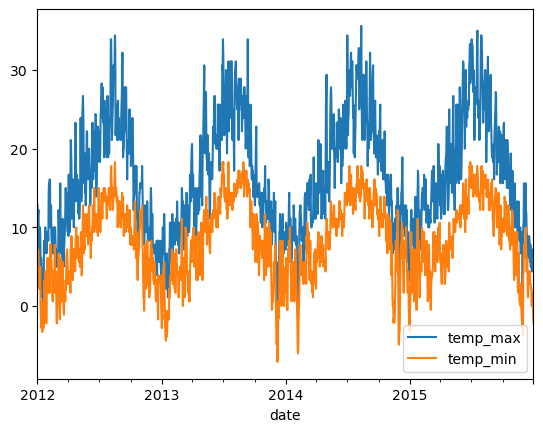

In [8]:
#analysis of data
weather[["temp_max","temp_min"]].plot()

In [9]:
#if we have a gap in this way to analysis of it
weather.index.year.value_counts().sort_index()

2012    366
2013    365
2014    365
2015    365
Name: date, dtype: int64

<Axes: xlabel='date'>

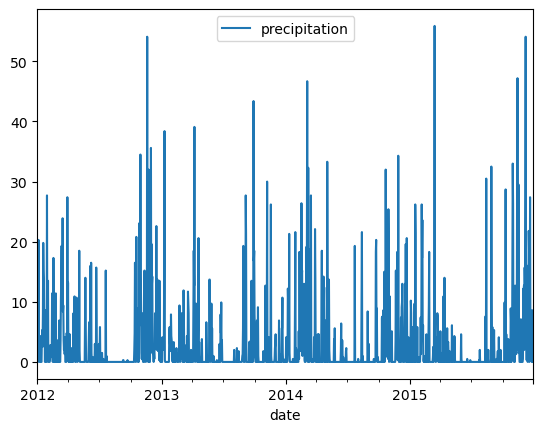

In [10]:
weather[['precipitation']].plot()

In [11]:
weather.groupby(weather.index.year).sum()

C:\Users\khushboo\AppData\Local\Temp\ipykernel_1572\270866129.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weather.groupby(weather.index.year).sum()


,precipitation,temp_max,temp_min,wind
date,,,,
2012,1226.0,5591.3,2668.0,1244.7
2013,828.0,5861.5,2976.2,1100.8
2014,1232.8,6203.5,3161.8,1236.5
2015,1139.2,6361.2,3225.0,1153.3


In [12]:
#Manchine learning
weather["target"]=weather.shift(-1)['temp_max']
weather

,precipitation,temp_max,temp_min,wind,weather,target
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,10.6
2012-01-02,10.9,10.6,2.8,4.5,rain,11.7
2012-01-03,0.8,11.7,7.2,2.3,rain,12.2
2012-01-04,20.3,12.2,5.6,4.7,rain,8.9
2012-01-05,1.3,8.9,2.8,6.1,rain,4.4
...,...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,rain,5.0
2015-12-28,1.5,5.0,1.7,1.3,rain,7.2
2015-12-29,0.0,7.2,0.6,2.6,fog,5.6


In [13]:
weather=weather.iloc[:-1,:].copy()

In [14]:
weather

,precipitation,temp_max,temp_min,wind,weather,target
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,10.6
2012-01-02,10.9,10.6,2.8,4.5,rain,11.7
2012-01-03,0.8,11.7,7.2,2.3,rain,12.2
2012-01-04,20.3,12.2,5.6,4.7,rain,8.9
2012-01-05,1.3,8.9,2.8,6.1,rain,4.4
...,...,...,...,...,...,...
2015-12-26,0.0,4.4,0.0,2.5,sun,4.4
2015-12-27,8.6,4.4,1.7,2.9,rain,5.0
2015-12-28,1.5,5.0,1.7,1.3,rain,7.2


In [15]:
from sklearn.linear_model import Ridge
reg=Ridge(alpha=.1)
predictors=['precipitation','temp_max','temp_min']
train=weather.loc[:"2014-12-31"]
test=weather.loc["2015-01-01":]
reg.fit(train[predictors],train["target"])


Ridge(alpha=0.1)

In [16]:
predictions=reg.predict(test[predictors])

In [17]:
from sklearn.metrics import mean_absolute_error

In [18]:
mean_absolute_error(test["target"],predictions)

2.21268859991925

In [19]:
combined=pd.concat([test["target"],pd.Series(predictions,index=test.index)],axis=1)
combined

,target,0
date,,
2015-01-01,5.6,5.607035
2015-01-02,5.0,6.221997
2015-01-03,10.6,6.207025
2015-01-04,12.2,10.366928
2015-01-05,12.2,13.063830
...,...,...
2015-12-26,4.4,5.367420
2015-12-27,5.0,5.262224
2015-12-28,7.2,6.124002


<Axes: xlabel='date'>

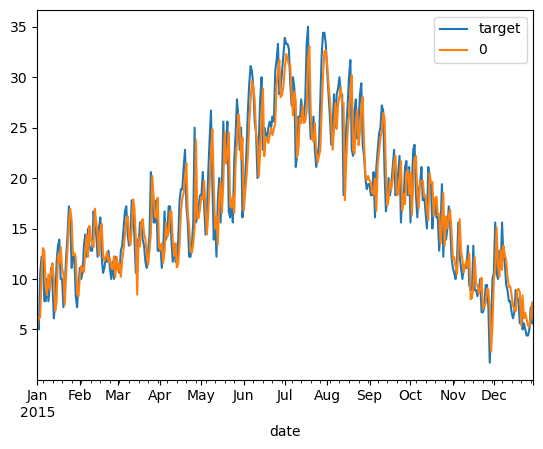

In [20]:
combined.plot()

In [21]:
reg.coef_

array([-0.0553489 ,  0.78133373,  0.21812054])

In [26]:
import numpy as np
weather["month_max"]=weather["temp_max"].rolling(30).mean()
weather = weather[~weather['month_max'].isin([np.nan, np.inf, -np.inf, None])]
weather["month_day_max"]=weather["month_max"]/weather["temp_max"]
weather = weather[~weather['month_day_max'].isin([np.nan, np.inf, -np.inf, None])]
weather["max_min"]= weather["temp_max"]/weather["temp_min"]
weather = weather[~weather['max_min'].isin([np.nan, np.inf, -np.inf, None])]
weather

C:\Users\khushboo\AppData\Local\Temp\ipykernel_1572\1694722218.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather["month_day_max"]=weather["month_max"]/weather["temp_max"]


,precipitation,temp_max,temp_min,wind,weather,target,month_max,month_day_max,max_min
date,,,,,,,,,
2012-01-30,3.6,8.3,6.1,5.1,rain,9.4,6.976667,0.840562,1.360656
2012-01-31,1.8,9.4,6.1,3.9,rain,8.9,6.863333,0.730142,1.540984
2012-02-01,13.5,8.9,3.3,2.7,rain,8.3,6.806667,0.764794,2.696970
2012-02-02,0.0,8.3,1.7,2.6,sun,14.4,6.693333,0.806426,4.882353
2012-02-03,0.0,14.4,2.2,5.3,sun,15.6,6.766667,0.469907,6.545455
...,...,...,...,...,...,...,...,...,...
2015-12-25,5.8,5.0,2.2,1.5,rain,4.4,8.696667,1.739333,2.272727
2015-12-27,8.6,4.4,1.7,2.9,rain,5.0,8.363333,1.900758,2.588235
2015-12-28,1.5,5.0,1.7,1.3,rain,7.2,8.290000,1.658000,2.941176


In [30]:
def create_predictions(predictors, weather, reg):
    train = weather.loc[:"2014-12-31"]
    test = weather.loc["2015-01-01":]

    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])

    error = mean_absolute_error(test["target"],predictions)
    
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

In [31]:
predictors=["precipitation","temp_max","temp_min","month_day_max","max_min"]
weather=weather.iloc[30:,:].copy()
error,combined=create_predictions(predictors,weather,reg)
error

2.215395026200971

In [32]:
weather = weather.dropna(subset=['temp_max'])
weather["monthly_avg"] = weather["temp_max"].groupby(weather.index.month).apply(
    lambda x: x.expanding(1).mean() if not x.empty else pd.Series(index=x.index)
)
weather["day_of_year_avg"] = weather["temp_max"].groupby(weather.index.day_of_year).apply(
    lambda x: x.expanding(1).mean() if not x.empty else pd.Series(index=x.index)
)


C:\Users\khushboo\AppData\Local\Temp\ipykernel_1572\4102319096.py:9: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  weather["monthly_avg"] = weather["temp_max"].groupby(weather.index.month).apply(
C:\Users\khushboo\AppData\Local\Temp\ipykernel_1572\4102319096.py:12: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., gro

In [33]:
error, combined = create_predictions(predictors + ["monthly_avg", "day_of_year_avg"], weather, reg)
error

2.1268197548177854

In [34]:
reg.coef_

array([-0.04362646,  0.62124665,  0.11868768,  0.03487621,  0.0171251 ,
        0.20491354,  0.07297238])

In [35]:
weather.corr()["target"]

C:\Users\khushboo\AppData\Local\Temp\ipykernel_1572\4195077598.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  weather.corr()["target"]


precipitation     -0.239027
temp_max           0.918321
temp_min           0.829894
wind              -0.146686
target             1.000000
month_max          0.840902
month_day_max     -0.154441
max_min           -0.005340
monthly_avg        0.856545
day_of_year_avg    0.894220
Name: target, dtype: float64

In [36]:
combined["diff"]=(combined["actual"]-combined["predictions"]).abs()
combined.sort_values("diff",ascending=False).head(10)

,actual,predictions,diff
date,,,
2015-04-26,25.0,15.431860,9.568140
2015-08-13,18.3,27.735446,9.435446
2015-05-31,16.1,23.349895,7.249895
2015-08-19,22.8,29.848326,7.048326
2015-07-09,21.1,27.932165,6.832165
2015-05-21,16.7,23.481969,6.781969
2015-09-24,15.6,21.963078,6.363078
2015-11-28,1.7,8.060899,6.360899
2015-03-25,20.6,14.251785,6.348215
